In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [54]:
start = '2010-01-01'
end = '2022-12-31'

df = data.DataReader('AAPL', 'stooq', start, end)
df.head()

NameError: name 'st' is not defined

In [6]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,6.40586,6.45421,6.36458,6.45401,5.246856e+08
2010-01-07,6.44444,6.45421,6.36409,6.41085,5.588893e+08
2010-01-06,6.52639,6.55241,6.41553,6.42221,6.452991e+08
2010-01-05,6.53905,6.56358,6.49230,6.52639,7.055130e+08
2010-01-04,6.49958,6.53008,6.46597,6.51522,5.764890e+08


In [7]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Volume
0,2022-12-30,128.41,129.9500,127.43,129.93,77034209.0
1,2022-12-29,127.99,130.4814,127.73,129.61,75703710.0
2,2022-12-28,129.67,131.0275,125.87,126.04,85438391.0
3,2022-12-27,131.38,131.4100,128.72,130.03,69007830.0
4,2022-12-23,130.92,132.4150,129.64,131.86,63814893.0


In [8]:
df = df.drop(['Date'], axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,128.41,129.9500,127.43,129.93,77034209.0
1,127.99,130.4814,127.73,129.61,75703710.0
2,129.67,131.0275,125.87,126.04,85438391.0
3,131.38,131.4100,128.72,130.03,69007830.0
4,130.92,132.4150,129.64,131.86,63814893.0


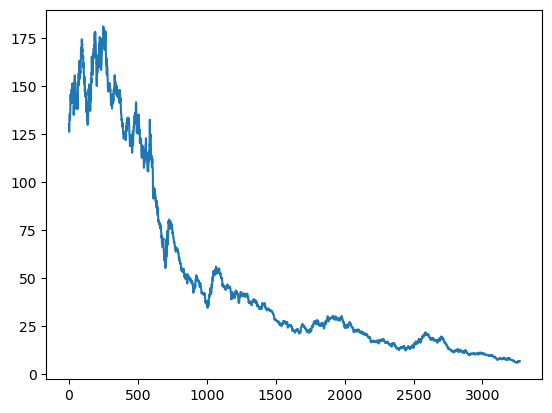

In [9]:
plt.plot(df.Close)

In [10]:
df

,Open,High,Low,Close,Volume
0,128.41000,129.95000,127.43000,129.93000,7.703421e+07
1,127.99000,130.48140,127.73000,129.61000,7.570371e+07
2,129.67000,131.02750,125.87000,126.04000,8.543839e+07
3,131.38000,131.41000,128.72000,130.03000,6.900783e+07
4,130.92000,132.41500,129.64000,131.86000,6.381489e+07
...,...,...,...,...,...
3267,6.40586,6.45421,6.36458,6.45401,5.246856e+08
3268,6.44444,6.45421,6.36409,6.41085,5.588893e+08
3269,6.52639,6.55241,6.41553,6.42221,6.452991e+08
3270,6.53905,6.56358,6.49230,6.52639,7.055130e+08


In [11]:
ma100 = df.Close.rolling(100).mean()

In [12]:
ma100

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    6.953343
3268    6.937090
3269    6.921914
3270    6.908978
3271    6.897006
Name: Close, Length: 3272, dtype: float64

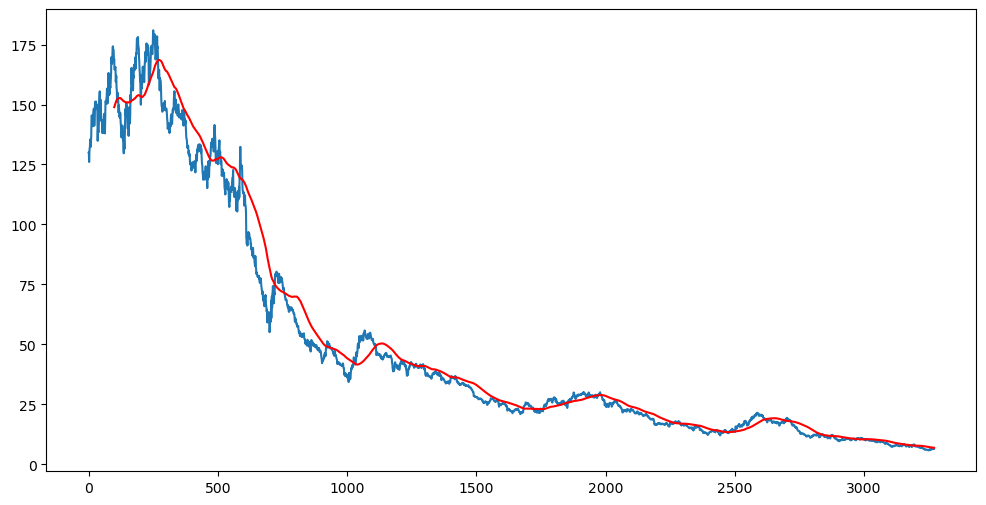

In [13]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [14]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
3267    7.532251
3268    7.517503
3269    7.502498
3270    7.487859
3271    7.473319
Name: Close, Length: 3272, dtype: float64

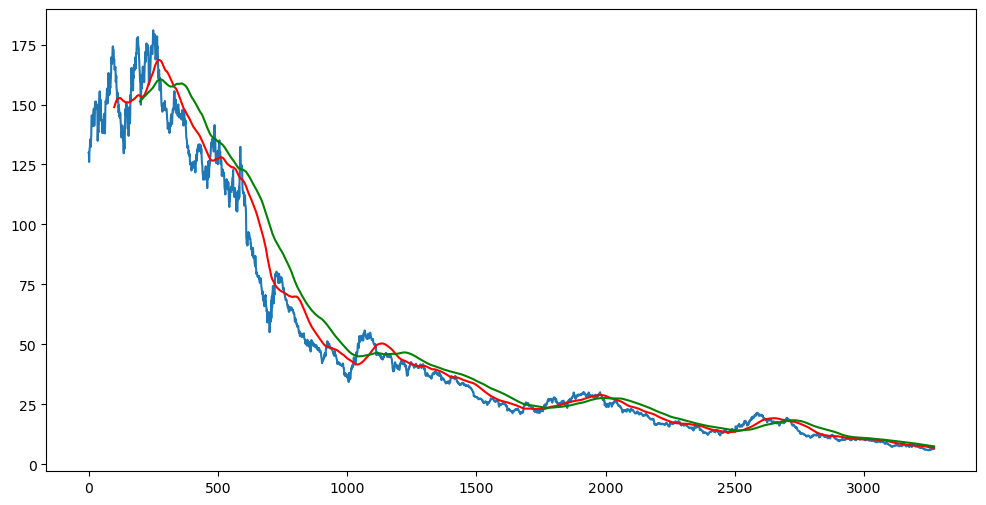

In [15]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [16]:
df.shape

(3272, 5)

In [18]:
# Spliting Data into Training and Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(2290, 1)
(982, 1)


In [19]:
data_training.head()

,Close
0,129.93
1,129.61
2,126.04
3,130.03
4,131.86


In [20]:
data_testing.head()

,Close
2290,16.4907
2291,16.3661
2292,16.4080
2293,16.2155
2294,16.3571


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.69115493],
       [0.68921814],
       [0.66761085],
       ...,
       [0.0107286 ],
       [0.00880391],
       [0.00640774]])

In [24]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])
    
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
# ML Model

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [32]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, 
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

In [33]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_1 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_2 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_3 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [34]:
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
69/69 [==============================] - 7s 93ms/step - loss: 0.0254
Epoch 2/50
69/69 [==============================] - 7s 95ms/step - loss: 0.0057
Epoch 3/50
69/69 [==============================] - 7s 96ms/step - loss: 0.0052
Epoch 4/50
69/69 [==============================] - 7s 96ms/step - loss: 0.0045
Epoch 5/50
69/69 [==============================] - 7s 96ms/step - loss: 0.0043
Epoch 6/50
69/69 [==============================] - 7s 96ms/step - loss: 0.0043
Epoch 7/50
69/69 [==============================] - 7s 96ms/step - loss: 0.0043
Epoch 8/50
69/69 [==============================] - 7s 96ms/step - loss: 0.0043
Epoch 9/50
69/69 [==============================] - 7s 96ms/step - loss: 0.0037
Epoch 10/50
69/69 [==============================] - 7s 96ms/step - loss: 0.0036
Epoch 11/50
69/69 [==============================] - 7s 95ms/step - loss: 0.0034
Epoch 12/50
69/69 [==============================] - 7s 96ms/step - loss: 0.0039
Epoch 13/50
69/69 [==================

In [35]:
model.save('keras_model.h5')

/Users/jiyaanadkat/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [36]:
model.save('my_model.keras')

In [37]:
data_testing.head()

,Close
2290,16.4907
2291,16.3661
2292,16.4080
2293,16.2155
2294,16.3571


In [38]:
past_100_days = data_training.tail(100)

In [39]:
final_df = past_100_days.append(data_testing, ignore_index=True)

/var/folders/5n/7c10qdc91v19vnjhhzzn2h9r0000gn/T/ipykernel_18966/531349220.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = past_100_days.append(data_testing, ignore_index=True)


In [40]:
final_df.head()

,Close
0,16.8407
1,16.8247
2,16.6273
3,16.4378
4,16.4060


In [41]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.7038546 ],
       [0.70283028],
       [0.69019266],
       ...,
       [0.03685908],
       [0.04352873],
       [0.04281362]])

In [42]:
input_data.shape

(1082, 1)

In [43]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [44]:
x_test, y_test = np.array(x_test), np.array(y_test)
print (x_test.shape)
print(y_test.shape)

(982, 100, 1)
(982,)


In [45]:
# Making Predictions

In [46]:
y_predicted = model.predict(x_test)

31/31 [==============================] - 1s 24ms/step


In [48]:
y_predicted.shape

(982, 1)

In [49]:
y_test

array([6.81447475e-01, 6.73470538e-01, 6.76152991e-01, 6.63829071e-01,
       6.72894354e-01, 6.71044166e-01, 6.83937867e-01, 6.90384718e-01,
       6.75128665e-01, 6.73848258e-01, 6.71876430e-01, 6.75000624e-01,
       6.58720246e-01, 6.75640828e-01, 6.78701001e-01, 6.81383454e-01,
       6.67855952e-01, 6.79341205e-01, 6.77612655e-01, 6.61153020e-01,
       6.87702264e-01, 6.79789347e-01, 6.91658723e-01, 6.77740696e-01,
       6.67535850e-01, 6.70532003e-01, 6.45640885e-01, 6.36703643e-01,
       6.29943092e-01, 6.24962308e-01, 6.19789463e-01, 6.13278592e-01,
       6.06966184e-01, 6.00961074e-01, 5.89539841e-01, 6.03137766e-01,
       5.93752381e-01, 5.94514223e-01, 6.06774123e-01, 6.03515486e-01,
       5.86665327e-01, 5.93240218e-01, 6.00192829e-01, 5.90685805e-01,
       6.05877838e-01, 6.08938011e-01, 5.62343990e-01, 5.72177518e-01,
       5.56991888e-01, 5.38099479e-01, 5.27753788e-01, 5.57440031e-01,
       5.73009783e-01, 5.62984194e-01, 6.16921350e-01, 6.40090320e-01,
      

In [50]:
y_predicted

array([[0.7477932 ],
       [0.74294055],
       [0.73619163],
       [0.7280358 ],
       [0.71892846],
       [0.7095562 ],
       [0.7005284 ],
       [0.69251627],
       [0.68613327],
       [0.68146646],
       [0.6783055 ],
       [0.6763085 ],
       [0.6751913 ],
       [0.6744275 ],
       [0.67392623],
       [0.67373645],
       [0.6739398 ],
       [0.6742755 ],
       [0.6747239 ],
       [0.6752461 ],
       [0.6754794 ],
       [0.67569506],
       [0.6759935 ],
       [0.67663884],
       [0.67746353],
       [0.67806816],
       [0.6782434 ],
       [0.67752254],
       [0.6755911 ],
       [0.67232835],
       [0.6678463 ],
       [0.662364  ],
       [0.6561709 ],
       [0.6495228 ],
       [0.6426309 ],
       [0.6355957 ],
       [0.6286962 ],
       [0.6221218 ],
       [0.61604214],
       [0.61077523],
       [0.6065204 ],
       [0.6031141 ],
       [0.6004163 ],
       [0.5983981 ],
       [0.59689534],
       [0.5959588 ],
       [0.5957037 ],
       [0.595

In [51]:
scaler.scale_

array([0.06402036])

In [52]:
scale_factor = 1/0.06402036
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

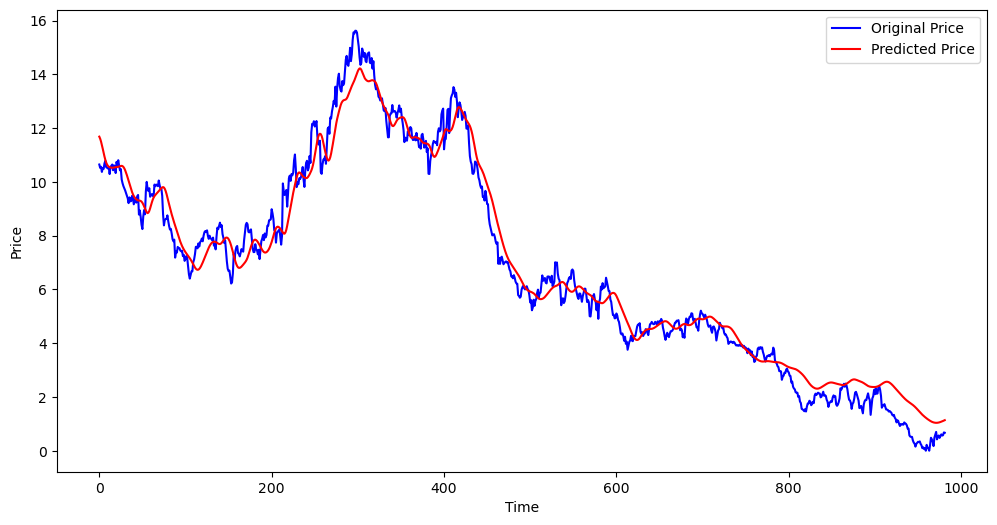

In [53]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original Price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()